In [1]:
%matplotlib inline

import math

import numpy as np
import scipy as sp
import pandas as pd

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.cross_validation import train_test_split


import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('../data/initial_data_urban_area.csv')

In [3]:
list(data.columns.values)

['UANUM',
 'UANAME',
 'UANAME_LONG',
 'StationCount',
 'PeoplePerStation',
 'StationsPerPerson',
 'IncentivesCount',
 'Population',
 'Households',
 'Owners',
 'percent_own',
 'State',
 'Household Income Less than $10,000',
 'Household Income $10,000 to $14,999',
 'Household Income $15,000 to $19,999',
 'Household Income $20,000 to $24,999',
 'Household Income $25,000 to $29,999',
 'Household Income $30,000 to $34,999',
 'Household Income $35,000 to $39,999',
 'Household Income $40,000 to $44,999',
 'Household Income $45,000 to $49,999',
 'Household Income $50,000 to $59,999',
 'Household Income $60,000 to $74,999',
 'Household Income $75,000 to $99,999',
 'Household Income $100,000 to $124,999',
 'Household Income $125,000 to $149,999',
 'Household Income $150,000 to $199,999',
 'Household Income $200,000 or more',
 'Geography',
 'Total; Estimate; Population 18 to 24 years',
 'Male; Estimate; Population 18 to 24 years',
 'Female; Estimate; Population 18 to 24 years',
 "Total; Estimate;

In [4]:
df = data[data['StationCount']>0]
print len(df)
# df["rate"] = df["Total"]/df["count"]
df = df.drop('UANUM', 1).drop('UANAME', 1).drop('UANAME_LONG', 1).drop('State', 1).drop('Geography', 1)
df = df.dropna()

1010


In [5]:
df = df.iloc[np.random.permutation(len(df))]
df.reset_index(drop=True)
df

,StationCount,PeoplePerStation,StationsPerPerson,IncentivesCount,Population,Households,Owners,percent_own,"Household Income Less than $10,000","Household Income $10,000 to $14,999",...,Female; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings,Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings - Bachelor's degree,Male; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings - Bachelor's degree,Female; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings - Bachelor's degree,Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings - Graduate or professional degree,Male; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings - Graduate or professional degree,Female; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings - Graduate or professional degree,graduate_25+,Latitude,Longitude
2190,8,3346.500000,0.000299,15,26772,12354,7303,59.114457,646,704,...,28243,36786,41696,30515,48846,54259,40921,3005.125,35.311111,-120.831389
35,1,9219.000000,0.000108,5,9219,3412,1870,54.806565,627,380,...,19283,29091,30188,29023,67102,72604,61029,462.924,42.243056,-84.753056
1724,2,26713.500000,0.000037,6,53427,23241,16301,70.138979,1455,1185,...,22405,37555,40536,32359,61970,69511,54737,2479.772,34.483889,-114.321667
565,3,51066.333330,0.000020,0,153199,66737,45723,68.512220,5061,4186,...,27572,44608,53746,38549,62515,72648,55407,12460.998,38.349722,-81.632778
975,1,73467.000000,0.000014,1,73467,27779,13956,50.239389,2182,1519,...,26819,47148,51040,41787,62126,72083,52570,4110.465,37.840278,-85.949167
225,2,32011.000000,0.000031,0,64022,25400,17541,69.059055,2575,2272,...,22456,37989,51883,33832,50231,60428,46102,2901.096,37.778056,-81.188333
287,18,41638.611110,0.000024,2,749495,297050,195377,65.772429,26259,16817,...,30833,49046,62032,39886,59177,78716,51218,63426.762,33.520556,-86.802500
1337,1,4427.000000,0.000226,2,4427,839,505,60.190703,79,25,...,37361,39844,39063,43000,79758,90781,61905,455.511,42.826944,-75.545000
2122,147,18033.265310,0.000056,3,2650890,1058354,720077,68.037443,56663,39084,...,37349,53686,64241,44614,70428,85026,60236,251848.137,44.938911,-93.117755
875,3,5338.666667,0.000187,2,16016,6354,3982,62.669185,645,400,...,25132,36992,40278,36495,70313,105893,58603,471.504,36.076944,-87.387778


In [6]:
ndata = df.values
ndata = np.hsplit(ndata, np.array([1]))
Y = ndata[0]
X = ndata[1]




In [12]:
train_X, dev_X, train_Y, dev_Y = train_test_split(X, Y, test_size=0.25, random_state=42)
print train_X.shape, train_Y.shape
print dev_X.shape, dev_Y.shape
# print train_X
# print train_Y

(719, 77) (719, 1)
(240, 77) (240, 1)
77


In [8]:
def try_reggressor(regressor) :

#     print train_X.shape, train_Y.shape
#     print dev_X.shape, dev_Y.shape

    regressor.fit(train_X, train_Y)
    dev_predictions = regressor.predict(dev_X)

    plt.plot(dev_Y, dev_predictions, 'r.')
    plt.show()

    _explained_variance_score = explained_variance_score(dev_Y, dev_predictions)
    _mean_absolute_error = mean_absolute_error(dev_Y, dev_predictions)
    _mean_squared_error = mean_squared_error(dev_Y, dev_predictions)
    _r2_score = r2_score(dev_Y, dev_predictions)
    print _explained_variance_score, _mean_absolute_error, _mean_squared_error, _r2_score


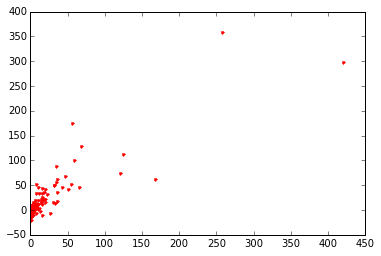

0.754517527788 7.71807222227 321.152270153 0.753755741896


In [9]:
try_reggressor(LinearRegression())

/opt/anaconda/envs/capstone/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


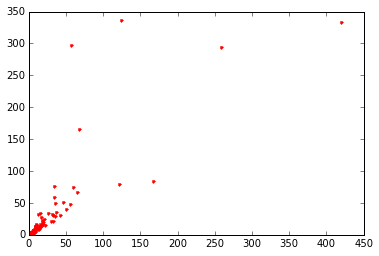

0.569500860992 4.93708333333 566.608875 0.565551313111
[  9.25027365e-03   6.56597738e-03   2.07418738e-03   2.96122364e-05
   1.22255952e-04   1.12184450e-04   1.04440484e-02   2.45860583e-05
   4.83782885e-05   6.15584848e-04   7.98955872e-06   2.23415183e-02
   2.60845249e-04   1.95858209e-03   5.47162793e-05   2.21196265e-05
   1.23744242e-04   3.69123670e-04   2.14061964e-03   1.19671780e-04
   6.41839913e-03   7.46605902e-02   1.43337089e-02   3.88376381e-04
   7.76260190e-03   8.55512014e-05   2.18423324e-04   1.07842694e-04
   9.43290611e-03   5.50313789e-05   2.03106616e-04   3.84658896e-05
   8.08384346e-06   1.39386061e-05   5.08885090e-04   2.95697433e-04
   2.25902440e-02   1.52273896e-03   5.02157450e-04   2.85044434e-02
   3.13120048e-04   6.39827420e-04   7.69944884e-02   2.31767000e-04
   4.86412363e-04   5.07772797e-05   6.12441438e-04   7.47140633e-02
   3.57428696e-01   4.70778899e-05   3.50099030e-05   5.82861986e-04
   5.04424903e-05   1.92297809e-04   8.40024738e

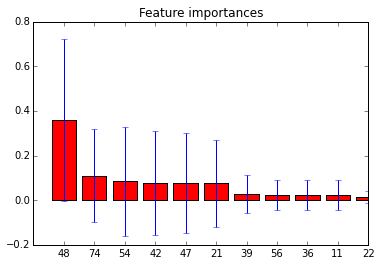

In [17]:
forest = RandomForestRegressor()
try_reggressor(forest)
print forest.feature_importances_

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

cols = train_X.shape[1]
for f in range(cols):
    print("%d. (%f) %s " % (f + 1, importances[indices[f]], df.columns[indices[f]+1]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(cols), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(cols), indices)
plt.xlim([-1, 10])
plt.show()

In [ ]:
try_reggressor(RandomForestRegressor())
try_reggressor(LinearRegression())